In [181]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
sns.set_style('whitegrid')


from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import train_test_split


import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Load in the data and do some basic EDA/Cleaning

In [2]:
df = pd.read_csv('/Users/christophermarker/Documents/DSI7/Miscellaneous/iowa_liquor_sales_proj_2.csv')

/Users/christophermarker/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df["Date"] = pd.to_datetime(df["Date"],infer_datetime_format=True)

In [461]:
df.Date.min()

Timestamp('2015-01-05 00:00:00')

In [462]:
df.Date.max()

Timestamp('2016-03-31 00:00:00')

In [84]:
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,Category,Category Name,...,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),County,County Number
0,S29198800001,2015-11-20,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",NaN,NaN,...,6,750,18.09,27.14,6,162.84,4.50,1.19,Lee,56
1,S29195400002,2015-11-21,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",NaN,NaN,...,6,750,18.09,27.14,12,325.68,9.00,2.38,Page,73
2,S29050300001,2015-11-16,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",NaN,NaN,...,20,150,6.40,9.60,2,19.20,0.30,0.08,Lee,56
3,S28867700001,2015-11-04,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,NaN,NaN,...,3,1750,35.55,53.34,3,160.02,5.25,1.39,Johnson,52
4,S29050800001,2015-11-17,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",NaN,NaN,...,20,150,6.40,9.60,2,19.20,0.30,0.08,Tama,86


In [4]:
df['Sale (Dollars)'] = df['Sale (Dollars)'].str.replace(',', '')
df['Sale (Dollars)'] = df['Sale (Dollars)'].str.replace('$', '')
df['Sale (Dollars)'] = df['Sale (Dollars)'].astype(float)

df['State Bottle Cost'] = df['State Bottle Cost'].str.replace(',', '')
df['State Bottle Cost'] = df['State Bottle Cost'].str.replace('$', '')
df['State Bottle Cost'] = df['State Bottle Cost'].astype(float)

df['State Bottle Retail'] = df['State Bottle Retail'].str.replace(',', '')
df['State Bottle Retail'] = df['State Bottle Retail'].str.replace('$', '')
df['State Bottle Retail'] = df['State Bottle Retail'].astype(float)

# https://stackoverflow.com/questions/38516481/trying-to-remove-commas-and-dollars-signs-with-pandas-in-python

In [5]:
df['County'].replace({"O'Brien":'OBrien'}, inplace=True)

In [6]:
df['Zip Code'].replace({'712-2':'51529'}, inplace=True)

In [7]:
df.loc[(df['Store Number'] == 3591) & (df['County'] == 'Webster'), 'County'] = 'Hardin'

In [8]:
df.isnull().sum()

Invoice/Item Number          0
Date                         0
Store Number                 0
Store Name                   0
Address                      0
City                         0
Zip Code                     0
Store Location               0
County Number            10913
County                   10913
Category                   779
Category Name             6109
Vendor Number                0
Vendor Name                  0
Item Number                  0
Item Description             0
Pack                         0
Bottle Volume (ml)           0
State Bottle Cost            0
State Bottle Retail          0
Bottles Sold                 0
Sale (Dollars)               0
Volume Sold (Liters)         0
Volume Sold (Gallons)        0
dtype: int64

In [9]:
df.apply(pd.Series.nunique)

Invoice/Item Number      2709552
Date                         284
Store Number                1403
Store Name                  1397
Address                     1398
City                         386
Zip Code                     743
Store Location              1745
County Number                 99
County                        99
Category                      89
Category Name                 73
Vendor Number                159
Vendor Name                  160
Item Number                 3865
Item Description            3029
Pack                          19
Bottle Volume (ml)            34
State Bottle Cost           1471
State Bottle Retail         1525
Bottles Sold                 275
Sale (Dollars)             11456
Volume Sold (Liters)         544
Volume Sold (Gallons)        538
dtype: int64

In [10]:
df.dtypes

Invoice/Item Number              object
Date                     datetime64[ns]
Store Number                      int64
Store Name                       object
Address                          object
City                             object
Zip Code                         object
Store Location                   object
County Number                   float64
County                           object
Category                        float64
Category Name                    object
Vendor Number                     int64
Vendor Name                      object
Item Number                       int64
Item Description                 object
Pack                              int64
Bottle Volume (ml)                int64
State Bottle Cost               float64
State Bottle Retail             float64
Bottles Sold                      int64
Sale (Dollars)                  float64
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
dtype: object

In [11]:
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,2015-11-20,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,...,297,Templeton Rye w/Flask,6,750,18.09,27.14,6,162.84,4.50,1.19
1,S29195400002,2015-11-21,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,...,297,Templeton Rye w/Flask,6,750,18.09,27.14,12,325.68,9.00,2.38
2,S29050300001,2015-11-16,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,6.40,9.60,2,19.20,0.30,0.08
3,S28867700001,2015-11-04,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,...,237,Knob Creek w/ Crystal Decanter,3,1750,35.55,53.34,3,160.02,5.25,1.39
4,S29050800001,2015-11-17,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,6.40,9.60,2,19.20,0.30,0.08


# Process to get rid of null values in county and county number columns

In [12]:
zc = pd.read_csv('/Users/christophermarker/Documents/DSI7/Miscellaneous/us_postal_codes.csv')

In [13]:
zc['County'].replace({"O'Brien":'OBrien'}, inplace=True)

In [14]:
zc = zc.loc[zc['State'] == 'Iowa']

In [15]:
zc['Zip Code'] = zc['Zip Code'].astype(str)

In [16]:
df['Zip Code'] = df['Zip Code'].astype(str)

In [17]:
list_1 = list(zc['Zip Code'])
list_2 = list(zc['County'])
zip_county = dict(zip(list_1, list_2)) 

In [18]:
df["County5"] = df["County"]

In [19]:
df.County5.fillna(df["Zip Code"], inplace=True)

In [20]:
df['County5'].replace(zip_county, inplace=True)

In [21]:
df.drop(['County'], axis=1, inplace=True)

In [22]:
df.rename(index=str, columns={"County5": "County"}, inplace=True)

In [23]:
# df["County4"] = df["Zip Code"].map(zip_county)

# This code maps an entire new series based on correspond keys/vlaues from another series
# Ended up using a aslightly different method
# df.drop(['County4'], axis=1, inplace=True)

In [24]:
cn = pd.read_csv('/Users/christophermarker/Documents/DSI7/Miscellaneous/county_numbers.csv')

In [25]:
cn['County_number'] = cn['County_number'].astype(str)

In [26]:
list_1b = list(cn['County_name'])
list_2b = list(cn['County_number'])
county_number = dict(zip(list_1b, list_2b)) 

In [27]:
df["County Number5"] = df["County Number"]

In [28]:
df["County Number5"].fillna(255, inplace=True)

In [29]:
df['County Number5'] = df['County Number5'].astype(int)

In [30]:
df['County Number5'].replace({255:df['County']}, inplace=True)

In [31]:
df['County Number5'] = df['County Number5'].astype(str)

In [32]:
df['County Number5'].replace(county_number, inplace=True)

In [33]:
df['County Number5'] = df['County Number5'].astype(int)

In [34]:
df.drop(['County Number'], axis=1, inplace=True)

In [35]:
df.rename(index=str, columns={"County Number5": "County Number"}, inplace=True)

# Get total liquor sales per county

In [36]:
# cn_list = list(cn['County_name'].values)

In [37]:
# def total_county_sales(df, cn_list):
#     total_sales_list = []
#     sof = sum(list(df['Sale (Dollars)'].values))
#     total_sales_list.append(sof)
#     for c in cn_list:
#         soc = sum(list(df[df['County'] == c]['Sale (Dollars)'].values))
#         total_sales_list.append(soc)
#     return total_sales_list
    

In [38]:
# soc = sum(df[df['County'] == 'Iowa']['Sale (Dollars)'].values)

In [39]:
# tcs_list = total_county_sales(df, cn_list)

In [399]:
tcs_list = [df['Sale (Dollars)'].sum()] + list(df.groupby('County')['Sale (Dollars)'].sum()) 

# Get total number of liquor stores per county

In [41]:
tls_list = [1403] + list(df.groupby('County')['Store Number'].nunique())

In [42]:
# w = [i[1] for i in donkey.index]

In [43]:
# dupes = [x for n, x in enumerate(w) if x in w[:n]]
# print(dupes)

# Get total population

In [44]:
cn2 = cn.copy()

In [45]:
data = []
 
data.insert(0, {'County_number': 0, 'County_name': 'Total Iowa', 'Sq_miles': 55861})

cn2 = pd.concat([pd.DataFrame(data), cn2], ignore_index=True)


In [46]:
# cn2 = cn2.drop(cn2.index[list(range(100, 198))])

# Get total number of bottles sold per county and average price per bottle

In [135]:
tbs_list = [df['Bottles Sold'].sum()] + list(df.groupby('County')['Bottles Sold'].sum()) 

In [155]:
abp_list = [df['State Bottle Retail'].mean()] + list(df.groupby('County')['State Bottle Retail'].mean())

# Read in USDA data, combine multiple excel sheets into one pandas DF and then attach totals from liquor data

Credit to Austin Lasseter for much of this section -- I used some code that he slacked out to us to read in the usda tables and merge them

In [47]:
employment=pd.read_excel('/Users/christophermarker/Documents/DSI7/Miscellaneous/Unemployment.xls', 
                         sheetname='Unemployment Med HH Inc',
                         header=6,
                         usecols=['FIPStxt', 'State', 'Area_name', 'Unemployment_rate_2016', 
                                  'Rural_urban_continuum_code_2013','Median_Household_Income_2016'])

In [48]:
employment.rename(columns = {'FIPStxt': 'FIPS'}, inplace=True)

In [49]:
employment=employment[employment.State=='IA']

In [50]:
employment['FIPS']= employment['FIPS'].astype(str)

In [51]:
employment=employment[employment.State=='IA']

In [52]:
population=pd.read_excel('/Users/christophermarker/Documents/DSI7/Miscellaneous/PopulationEstimates.xls',
                         sheetname='Population Estimates 2010-2016',
                         header=2, 
                         usecols=['FIPS', 'State','CENSUS_2010_POP'])

In [53]:
population['FIPS']= population['FIPS'].astype(str)

In [54]:
population=population[population.State=='IA']

In [55]:
# df.County.sort_values().unique()

In [56]:
population.drop('State', axis=1, inplace=True)

In [57]:
usda=pd.merge(employment, population, on='FIPS')

In [58]:
extra_usda = usda['Area_name'].str.split(' County', n=-1, expand=True)

In [59]:
usda['County'] = extra_usda[0]

In [60]:
usda.drop('Area_name', axis=1, inplace=True)

In [61]:
usda['County'].replace({"O'Brien":'OBrien'}, inplace=True)

In [62]:
usda['Sq_miles'] = cn2['Sq_miles']

In [400]:
usda['Total Liquor Sales'] = tcs_list

In [64]:
usda['Liquor Sales Per Capita'] = usda['Total Liquor Sales'] / usda['CENSUS_2010_POP']

In [65]:
usda['Population Density'] =  usda['CENSUS_2010_POP'] / usda['Sq_miles']

In [66]:
usda['Total Liquor Stores'] = tls_list

In [137]:
usda['Total Bottles Sold'] = tbs_list

In [156]:
usda['Average Bottle Price'] = abp_list

In [159]:
usda['Average Bottle Price^2'] = usda['Average Bottle Price'] ** 2

In [100]:
# large numbers

usda['Liquor Store Density'] = usda['Sq_miles'] / usda['Total Liquor Stores']

In [68]:
# small numbers

usda['Liquor Store Density'] = usda['Total Liquor Stores'] / usda['Sq_miles']

In [326]:
# large numbers

usda['Liquor Stores Per Capita'] = usda['CENSUS_2010_POP'] / usda['Total Liquor Stores']

In [117]:
# small numbers

usda['Liquor Stores Per Capita'] = usda['Total Liquor Stores'] / usda['CENSUS_2010_POP']

In [118]:
usda['TPC * 1000'] = usda['Liquor Stores Per Capita'] * 1000

In [401]:
usda.head()

,FIPS,State,Rural_urban_continuum_code_2013,Unemployment_rate_2016,Median_Household_Income_2016,CENSUS_2010_POP,County,Sq_miles,Total Liquor Sales,Liquor Sales Per Capita,Population Density,Total Liquor Stores,Liquor Store Density,Liquor Stores Per Capita,TPC * 1000,Total Bottles Sold,Average Bottle Price,Average Bottle Price^2
0,19000,IA,NaN,3.7,56354.0,3046355,Iowa,55861,3.498549e+08,114.843778,54.534559,1403,39.815396,2171.315039,0.460550,26657629,14.740118,217.271065
1,19001,IA,8.0,3.0,53416.0,7682,Adair,569,5.301801e+05,69.015898,13.500879,8,71.125000,960.250000,1.041395,43503,13.739184,188.765165
2,19003,IA,9.0,2.7,46939.0,4029,Adams,424,1.224313e+05,30.387513,9.502358,1,424.000000,4029.000000,0.248201,10173,15.302268,234.159402
3,19005,IA,6.0,5.0,49439.0,14330,Allamakee,640,1.003697e+06,70.041632,22.390625,6,106.666667,2388.333333,0.418702,74610,14.937870,223.139974
4,19007,IA,7.0,4.8,39124.0,12887,Appanoose,496,1.012266e+06,78.549409,25.981855,6,82.666667,2147.833333,0.465585,81618,14.404090,207.477801


In [72]:
usda.columns

Index(['FIPS', 'State', 'Rural_urban_continuum_code_2013',
       'Unemployment_rate_2016', 'Median_Household_Income_2016',
       'CENSUS_2010_POP', 'County', 'Sq_miles', 'Total Liquor Sales',
       'Liquor Sales Per Capita', 'Population Density', 'Total Liquor Stores',
       'Liquor Store Density', 'Liquor Stores Per Capita'],
      dtype='object')

# Run Multinomial Linear Regression

In [525]:
## Model I

In [526]:
df2 = usda.drop([0])

In [527]:
df2.drop(['Rural_urban_continuum_code_2013', 'Unemployment_rate_2016', 'Median_Household_Income_2016'], axis=1, inplace=True)

In [528]:
lm = linear_model.LinearRegression()

X = df2[['Population Density', 'Liquor Stores Per Capita', 'Liquor Store Density', 
         'Total Bottles Sold', 'Average Bottle Price']]
y = df2['Liquor Sales Per Capita'] 

lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [529]:
predictions = lm.predict(X)

In [530]:
mean_squared_error(predictions, y)

668.8125845109081

In [531]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [532]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [533]:
print(lm.score(X_train, y_train))

0.712581622616


In [534]:
print(lm.score(X_test, y_test))

-0.395847040597


In [535]:
scores = cross_val_score(lm, X, y, cv=3)
scores

array([ 0.43323399,  0.68733979,  0.24229648])

In [536]:
predictions = cross_val_predict(lm, X, y, cv=5)
r2 = metrics.r2_score(y, predictions)
print(r2)

0.429115531057


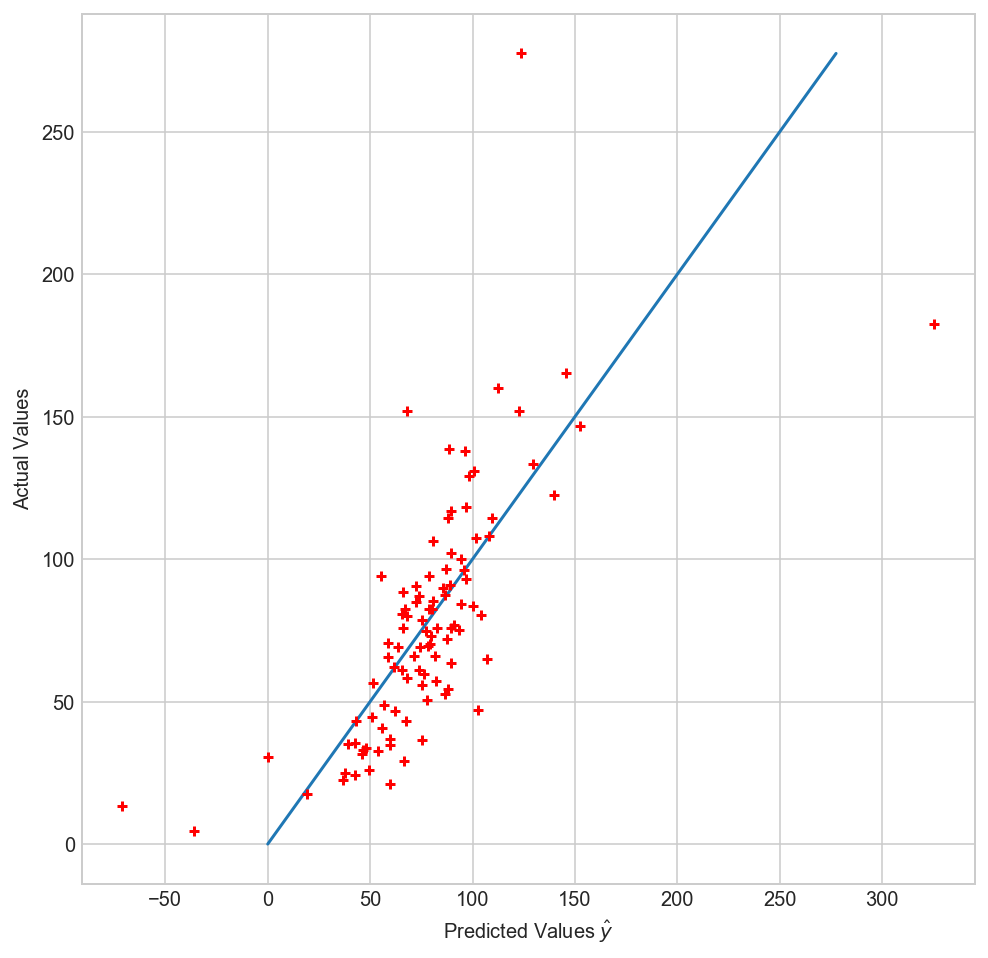

In [537]:
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values $\hat{y}$")
plt.ylabel("Actual Values")

plt.plot([0, np.max(y)], [0, np.max(y)])

In [538]:
df2['y_hat'] = predictions

In [539]:
df2['errors'] = df2['y_hat'] - df2['Liquor Sales Per Capita'] 

In [540]:
df2['errors'].max()

142.84047226473805

In [541]:
df2.sort_values('errors', ascending =False)

,FIPS,State,CENSUS_2010_POP,County,Sq_miles,Total Liquor Sales,Liquor Sales Per Capita,Population Density,Total Liquor Stores,Liquor Store Density,Liquor Stores Per Capita,TPC * 1000,Total Bottles Sold,Average Bottle Price,Average Bottle Price^2,y_hat,errors
77,19153,IA,430640,Polk,570,7.854702e+07,182.396024,755.508772,208,2.740385,2070.384615,0.483002,5823190,15.339971,235.314723,325.236497,142.840472
22,19043,IA,18129,Clayton,779,8.525852e+05,47.028802,23.272144,12,64.916667,1510.750000,0.661923,61565,15.494100,240.067125,102.630426,55.601624
81,19161,IA,10350,Sac,576,6.709874e+05,64.829704,17.968750,7,82.285714,1478.571429,0.676329,50493,15.732678,247.517143,107.121940,42.292236
65,19129,IA,15059,Mills,437,5.495891e+05,36.495723,34.459954,6,72.833333,2509.833333,0.398433,47747,14.516095,210.717018,75.371804,38.876081
93,19185,IA,6403,Wayne,526,1.352292e+05,21.119669,12.173004,3,175.333333,2134.333333,0.468530,10755,14.643492,214.431846,59.707724,38.588055
89,19177,IA,7570,Van Buren,485,2.199142e+05,29.050753,15.608247,3,161.666667,2523.333333,0.396301,16229,14.763702,217.966892,66.400876,37.350123
62,19123,IA,22381,Mahaska,571,1.177849e+06,52.627203,39.196147,6,95.166667,3730.166667,0.268085,96208,15.077302,227.325030,86.524000,33.896797
84,19167,IA,33704,Sioux,768,1.834621e+06,54.433330,43.885417,9,85.333333,3744.888889,0.267031,123365,14.881450,221.457542,88.180975,33.747645
66,19131,IA,10776,Mitchell,469,5.445430e+05,50.532941,22.976546,5,93.800000,2155.200000,0.463994,42523,14.698779,216.054110,77.521946,26.989005
51,19101,IA,16843,Jefferson,435,1.071614e+06,63.623688,38.719540,4,108.750000,4210.750000,0.237487,81746,15.384084,236.670051,89.548692,25.925004


In [543]:
# Model II

In [566]:
lm2 = linear_model.LinearRegression()

X2 = df2[['Population Density', 'Liquor Stores Per Capita', 'Liquor Store Density', 
         'Total Bottles Sold', 'Average Bottle Price', 'Liquor Sales Per Capita']]
y2 = df2['Total Liquor Sales'] 

lm2.fit(X2, y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [567]:
predictions2 = lm2.predict(X2)

In [568]:
mean_squared_error(predictions2, y2)

215657962044.49933

In [569]:
np.sqrt(219403813090.5213)

468405.60744991223

In [570]:
(np.sum(tcs_list) - 349854916.2888579) / 99

3533888.0433337283

In [571]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.5)

In [572]:
lm2.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [573]:
print(lm2.score(X_train2, y_train2))

0.999798635577


In [574]:
print(lm2.score(X_test2, y_test2))

0.985781300168


In [575]:
scores2 = cross_val_score(lm2, X2, y2, cv=3)
scores2

array([ 0.97086119,  0.99660463,  0.99580387])

In [576]:
predictions2 = cross_val_predict(lm2, X2, y2, cv=5)
r22 = metrics.r2_score(y2, predictions2)
print(r22)

0.992421141912


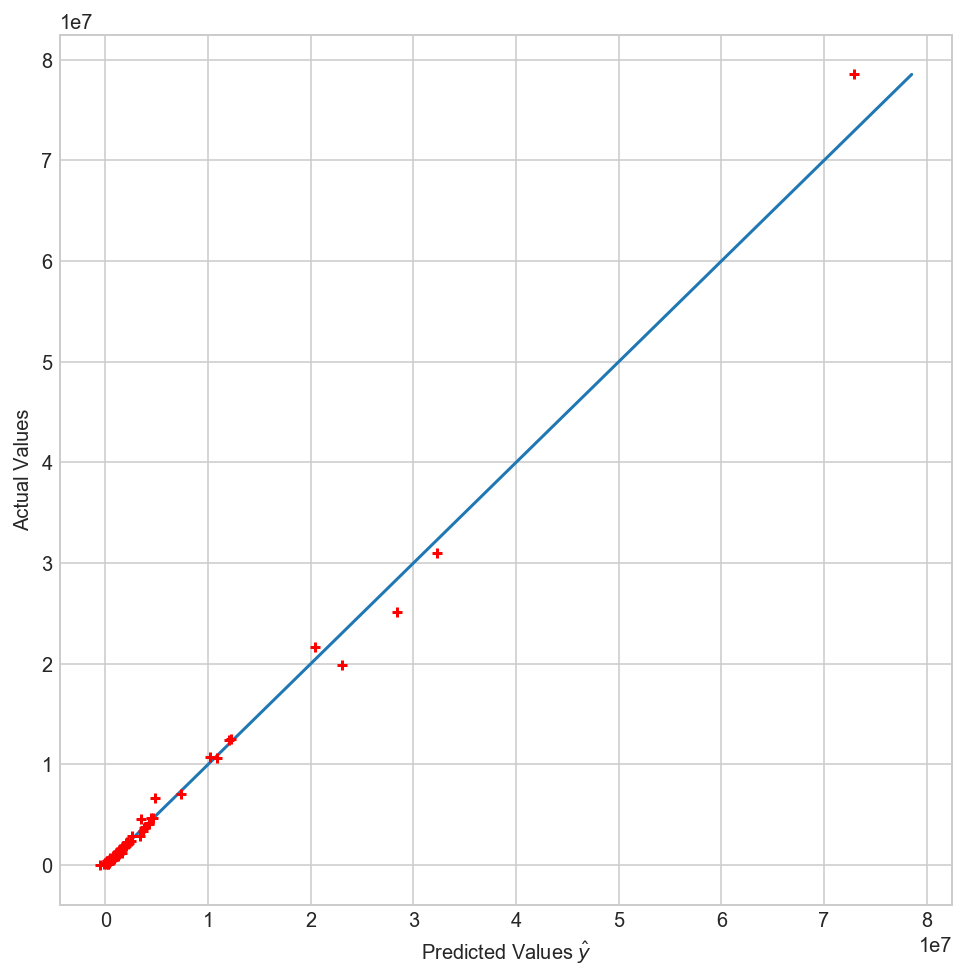

In [577]:
plt.figure(figsize=(8,8))
plt.scatter(predictions2, y2, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values $\hat{y}$")
plt.ylabel("Actual Values")

plt.plot([0, np.max(y2)], [0, np.max(y2)])

In [578]:
df2['y_hat2'] = predictions2

In [579]:
df2['errors2'] = df2['y_hat2'] - df2['Total Liquor Sales'] 

In [580]:
df2['errors2'].max()

3274630.4384093583

# Visuals

In [583]:
bins = [0, 100, 200, 300, 400, 800]
df2['density_bins'] = pd.cut(df2['Population Density'], bins)

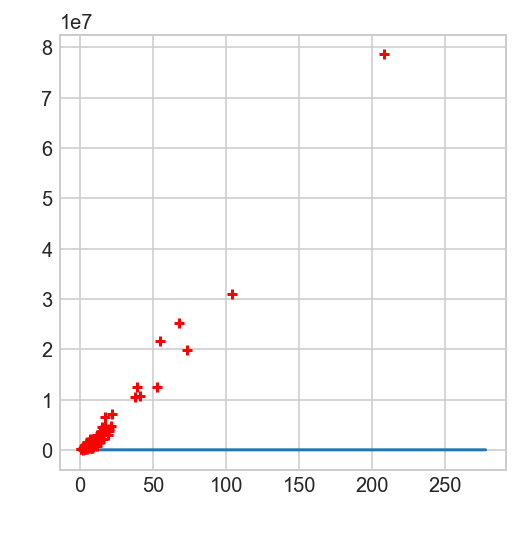

In [584]:
plt.figure(figsize=(4,4))
plt.scatter(df2['Total Liquor Stores'], df2['Total Liquor Sales'], s=30, c='r', marker='+', zorder=10)
plt.xlabel(" ")
plt.ylabel(" ")

plt.plot([0, np.max(y)], [0, np.max(y)])

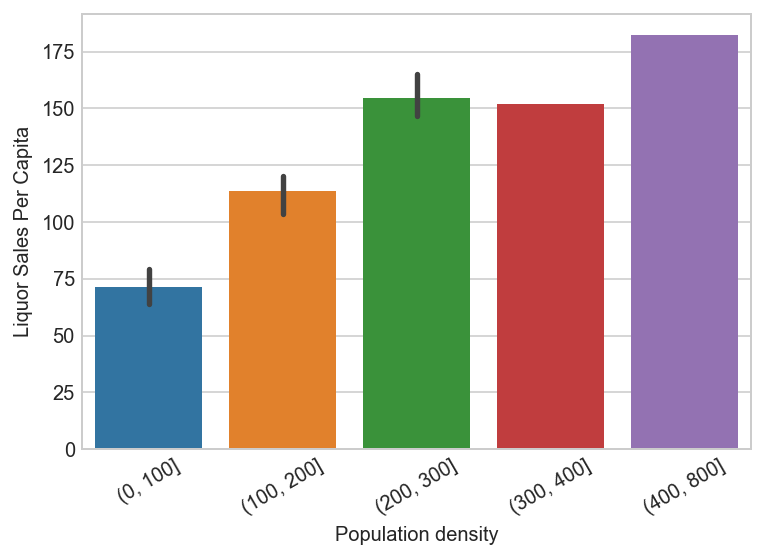

In [585]:

ax = sns.barplot(x=df2['density_bins'], y=df2['Liquor Sales Per Capita'])
ax.set(xlabel='Population density', ylabel='Liquor Sales Per Capita')
labels = ax.get_xticklabels()
ax.set_xticklabels(labels, rotation=30)

plt.show()

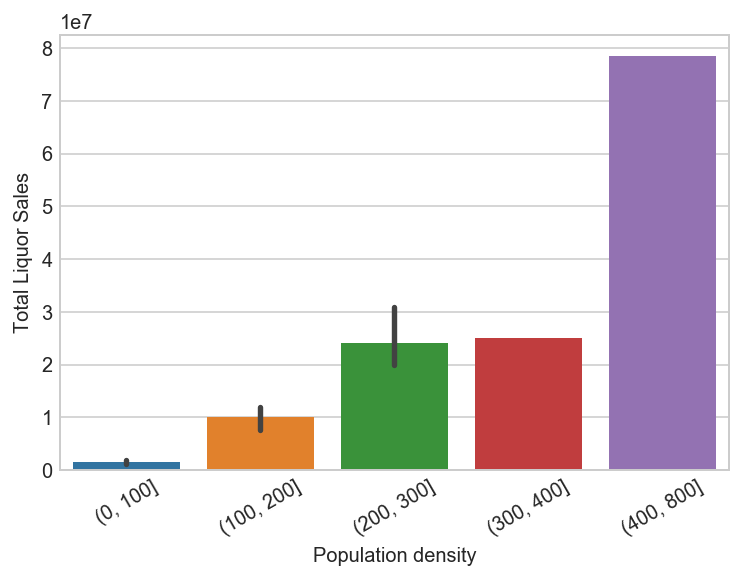

In [586]:
ax = sns.barplot(x=df2['density_bins'], y=df2['Total Liquor Sales'])
ax.set(xlabel='Population density', ylabel='Total Liquor Sales')
labels = ax.get_xticklabels()
ax.set_xticklabels(labels, rotation=30)

plt.show()


In [588]:
df2.to_csv('/Users/christophermarker/Documents/DSI7/Miscellaneous/newcsv.csv')

In [589]:
df2.columns

Index(['FIPS', 'State', 'CENSUS_2010_POP', 'County', 'Sq_miles',
       'Total Liquor Sales', 'Liquor Sales Per Capita', 'Population Density',
       'Total Liquor Stores', 'Liquor Store Density',
       'Liquor Stores Per Capita', 'TPC * 1000', 'Total Bottles Sold',
       'Average Bottle Price', 'Average Bottle Price^2', 'y_hat', 'errors',
       'y_hat2', 'errors2', 'density_bins'],
      dtype='object')

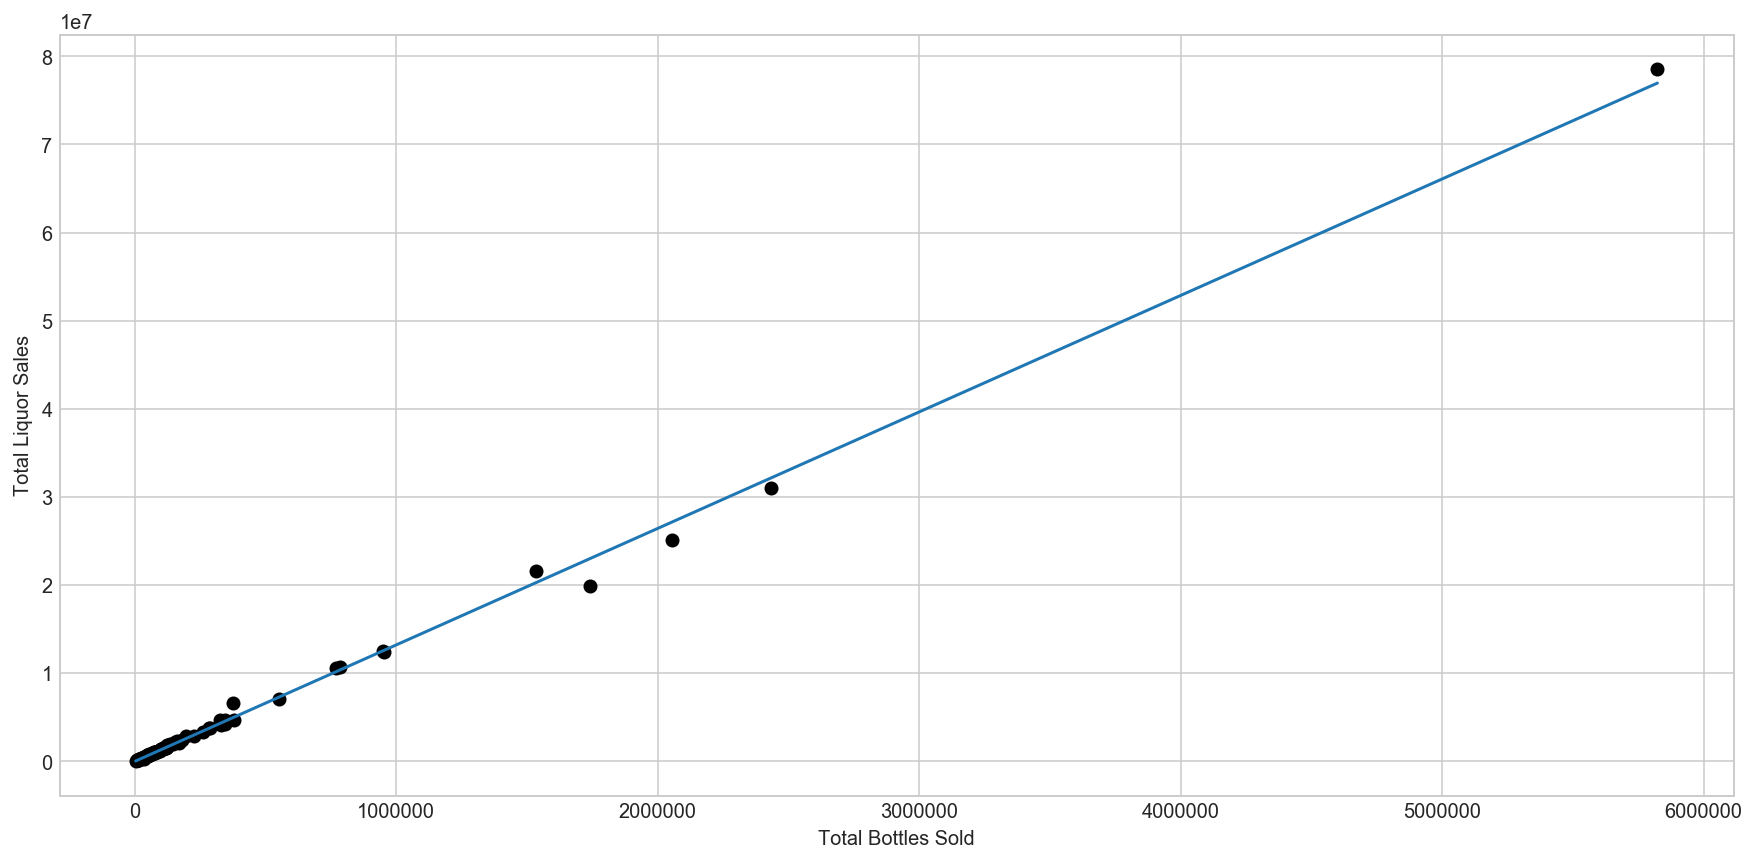

In [590]:
n = df2['Total Bottles Sold']
test_accuracy2 = df2['Total Liquor Sales']

fig = plt.figure(figsize=(15,7))
ax = plt.gca()
ax.set(xlabel='Total Bottles Sold', ylabel='Total Liquor Sales')
ax.scatter(n, test_accuracy2, c='k')
plt.plot(np.unique(n), np.poly1d(np.polyfit(n, test_accuracy2, 1))(np.unique(n)))